# Finding Optimal K for K-means clustering
Clustering of ISH principal components (271 PCs)
<br>Saving results in ./ABA/PCA/Elbow/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [4]:
# Loading the principal components array
pc_array = np.load('/data/bioprotean/ABA/PCA/PC_n271.npy')

In [ ]:
# Trying the elbow method
ks = range(1, 100)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(pc_array)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.savefig('/data/bioprotean/ABA/PCA/Elbow/elbow_figure.png')

The results of Elbow method did not show a clear point.
<br>Trying the Silhouette method.

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 100

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(pc_array)
  labels = kmeans.labels_
  sil.append(silhouette_score(x, labels, metric = 'euclidean'))

np.save('/data/bioprotean/ABA/PCA/optimum_K/silhouette_score.npy', np.array(sil))

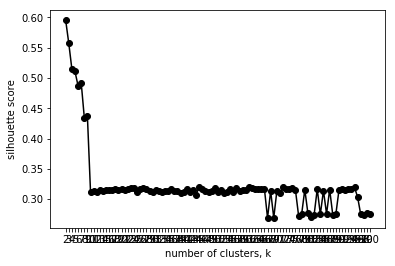

In [2]:
# Visualizing the silhouette method results
silh_score_array = np.load('/data/bioprotean/ABA/PCA/optimum_K/silhouette_score.npy')
ks = range(2,101)
plt.plot(ks, silh_score_array, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette score')
plt.xticks(ks)
plt.show()